In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import norm, multivariate_normal

from cpsplines.fittings.grid_cpsplines import GridCPsplines
from cpsplines.graphics.plot_one_smoothing import plot_curves, plot_surfaces

*Example 1*. Given the function 
$$f(x) = \exp\left(4-\frac{x}{25}\right)+4\cos\left(\frac{x}{8}\right)$$
we simulated noisy data following the scheme
$$y_l= f(x_l)+\varepsilon_l, \quad \varepsilon_l\sim \text{N}(0,6),$$
where $x_l=0,1,2,\ldots, 200.$ 

We fit an unconstrained and a constraint model imposing non-negative constraints
over the interval $[-11,211]$. 

Top 5 combinations minimizing the GCV criterion
sp1		Objective
0.1		9.123306605766421
0.01		9.316733743666106
1.0		9.524234897536807
10.0		15.728444795029523
Starting the optimization algorithm
sp1		Objective
2.17997e-01	9.10520e+00
1.32980e-01	9.11084e+00
1.91016e-01	9.10414e+00
1.91441e-01	9.10414e+00
1.91434e-01	9.10414e+00
1.91434e-01	9.10414e+00


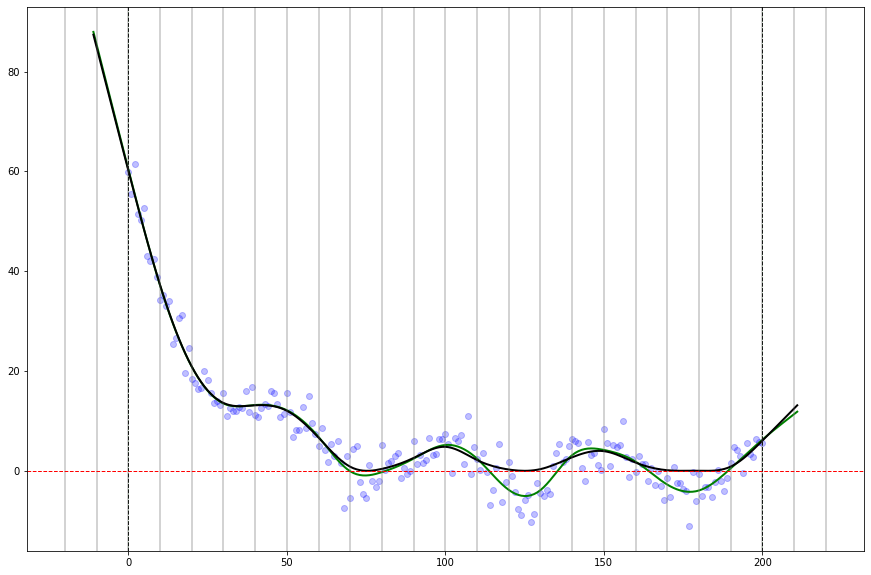

In [3]:
np.random.seed(5)
x1 = np.linspace(0, 200, 201)
y1 = np.exp(4 - x1 / 25) + 4 * np.cos(x1 / 8) + np.random.normal(0, 3, 201)

example1_1 = GridCPsplines(
    deg=(3,),
    ord_d=(2,),
    n_int=(20,),
    sp_method="grid_search",
    sp_args={"top_n": 5},
    x_range={0: (-11, 211)}
)
example1_1.fit(x=(x1,), y=y1)

example1_2 = GridCPsplines(
    deg=(3,),
    ord_d=(2,),
    n_int=(20,),
    sp_method="optimizer",
    x_range={0: (-11, 211)},
    sp_args={"verbose": True, "options": {"ftol": 1e-12}},
    int_constraints={0: {0: {"+": 0}}}
)
example1_2.fit(x=(x1,), y=y1)

plot_1 = plot_curves(
    fittings=(example1_1, example1_2),
    col_curve=("g", "k"),
    knot_positions=True,
    constant_constraints=True,
    x=(x1,), 
    y=(y1,),
    col_pt=("b",),
    alpha=0.25
)

*Example 2*. Given the same function and generative process as *Example 1*, we
fit an unconstrained and a constrained model imposing the curve only attain
values in $[10,40]$ over the interval $[-11,211]$. 

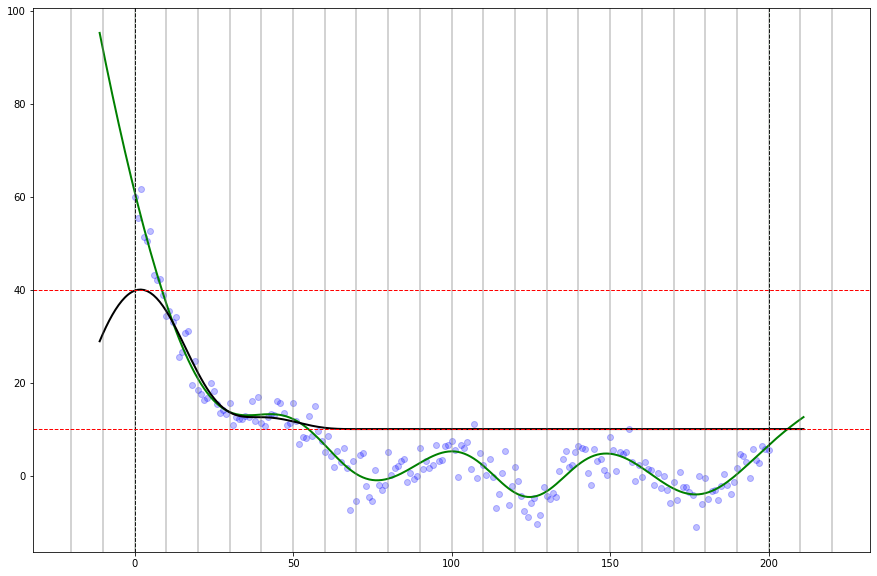

In [4]:
np.random.seed(5)
x2 = np.linspace(0, 200, 201)
y2 = np.exp(4 - x2 / 25) + 4 * np.cos(x2 / 8) + np.random.normal(0, 3, 201)
example2_1 = GridCPsplines(
    deg=(5,),
    ord_d=(3,),
    n_int=(20,),
    x_range={0: (-11, 211)},
    sp_args={"options": {"ftol": 1e-12}}
)
example2_1.fit(x=(x2,), y=y2)

example2_2 = GridCPsplines(
    deg=(5,),
    ord_d=(3,),
    n_int=(20,),
    x_range={0: (-11, 211)},
    int_constraints={0: {0: {"+": 10, "-": 40}}},
    sp_args={"options": {"ftol": 1e-12}}
)
example2_2.fit(x=(x2,), y=y2)

plot_2 = plot_curves(
    fittings=(example2_1, example2_2),
    col_curve=("g", "k"),
    knot_positions=True,
    constant_constraints=True,
    x=(x2,), 
    y=(y2,),
    col_pt=("b",),
    alpha=0.25
)

*Example 3*. Given the function 
$$f(x) = \tanh\left(\frac{x}{10}\right)$$
we simulated noisy data following the scheme
$$y_l= f(x_l)+\varepsilon_l, \quad \varepsilon_l\sim \text{N}(0,0.25),$$
where $x_l=-100, -99,\ldots, 100.$ 

We fit an unconstrained and a constrained model imposing non-decreasing
constraints over the interval $[-100,100]$ (no prediction). 

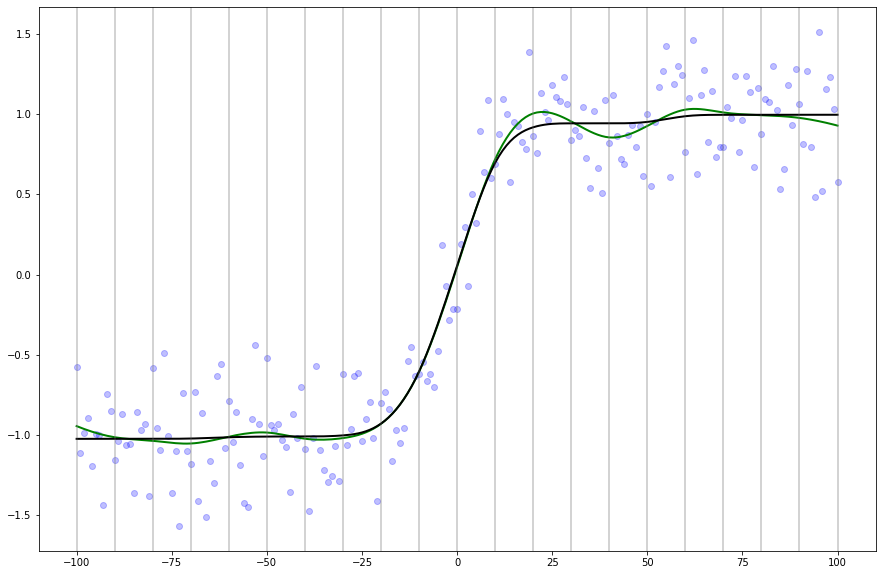

In [5]:
np.random.seed(7)
x3 = np.linspace(-100, 100, 201)
y3 = np.tanh(x3 / 10) + np.random.normal(0, 0.25, 201)

example3_1 = GridCPsplines(
    deg=(3,),
    ord_d=(2,),
    n_int=(20,),
    sp_args={"options": {"ftol": 1e-12}},
)
example3_1.fit(x=(x3,), y=y3)

example3_2 = GridCPsplines(
    deg=(3,),
    ord_d=(2,),
    n_int=(20,),
    sp_args={"options": {"ftol": 1e-12}},
    int_constraints={0: {1: {"+": 0}}}
)
example3_2.fit(x=(x3,), y=y3)

plot_3 = plot_curves(
    fittings=(example3_1, example3_2),
    col_curve=("g", "k"),
    knot_positions=True,
    constant_constraints=True,
    x=(x3,), 
    y=(y3,),
    col_pt=("b",),
    alpha=0.25
)

*Example 4*. Given the function 
$$f(x) = (2x - 1)^3$$
we simulated noisy data following the scheme
$$y_l= f(x_l)+\varepsilon_l, \quad \varepsilon_l\sim \text{N}(0,0.25),$$
where $x_l=0, 0.02, 0.04,\ldots, 1.$ 

We fit an unconstrained and a constrained model imposing non-decreasing constraints over the interval $[0,1]$ (no prediction). 

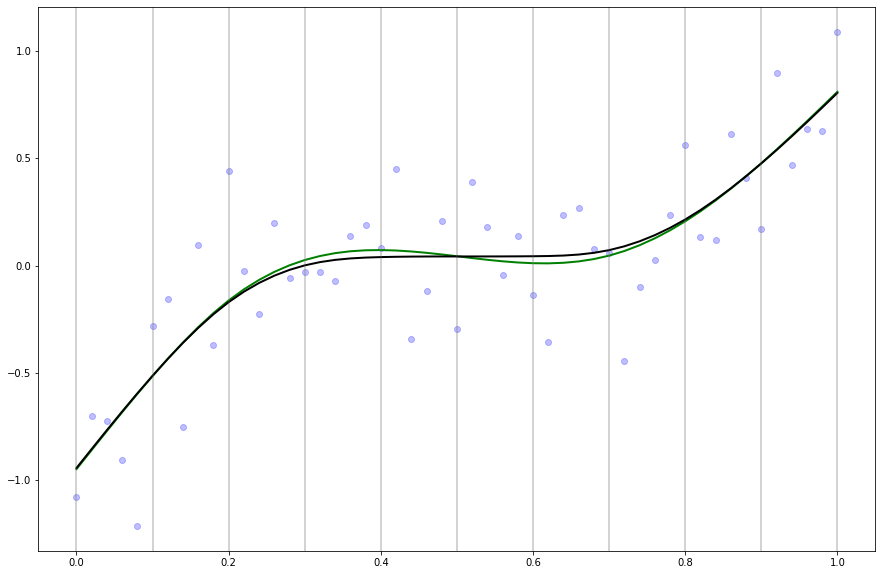

In [6]:
np.random.seed(6)
x4 = np.linspace(0, 1, 51)
y4 =  (2 * x4 - 1) ** 3 + np.random.normal(0, 0.25, 51)

example4_1 = GridCPsplines(
    deg=(3,),
    ord_d=(2,),
    n_int=(10,),
    sp_args={"options": {"ftol": 1e-12}},
)
example4_1.fit(x=(x4,), y=y4)

example4_2 = GridCPsplines(
    deg=(3,),
    ord_d=(2,),
    n_int=(10,),
    sp_args={"options": {"ftol": 1e-12}},
    int_constraints={0: {1: {"+": 0}}}
)
example4_2.fit(x=(x4,), y=y4)

plot_4 = plot_curves(
    fittings=(example4_1, example4_2),
    col_curve=("g", "k"),
    knot_positions=True,
    constant_constraints=True,
    x=(x4,), 
    y=(y4,),
    col_pt=("b",),
    alpha=0.25
)

*Example 5*. Given the function 
$$f(x) = \log(2x+1)$$
we simulated noisy data following the scheme
$$y_l= f(x_l)+\varepsilon_l, \quad \varepsilon_l\sim \text{N}(0,0.25),$$
where $x_l=1, 1.1, 1.2,\ldots, 10.$ 

We fit an unconstrained and a constrained model imposing non-decreasing and
concavity constraints over the interval $[0,12]$. 

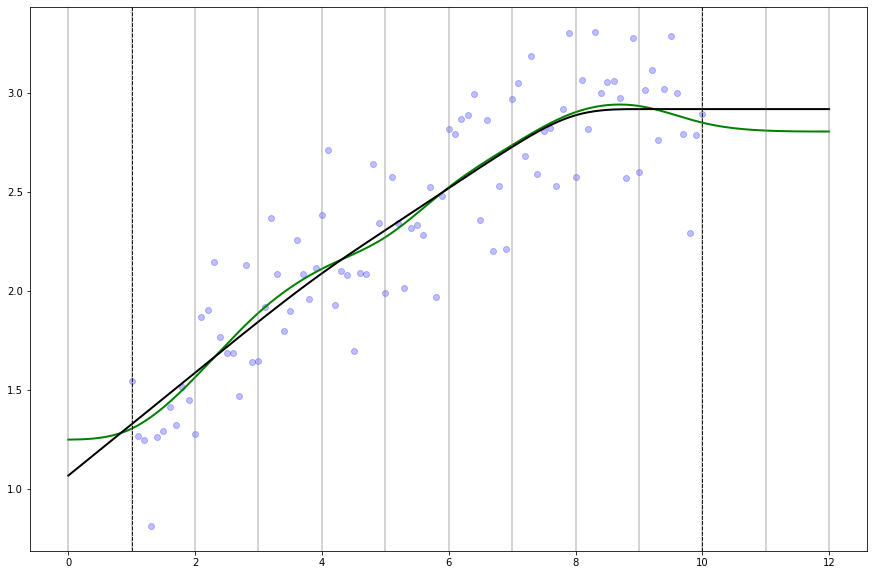

In [7]:
np.random.seed(3)
x5 = np.linspace(1, 10, 91)
y5 = np.log(2 * x5 + 1) + np.random.normal(0, 0.25, 91)

example5_1 = GridCPsplines(
    deg=(3,),
    ord_d=(1,),
    n_int=(9,),
    x_range={0: (0, 12)},
    sp_args={"options": {"ftol": 1e-12}},
)
example5_1.fit(x=(x5,), y=y5)

example5_2 = GridCPsplines(
    deg=(3,),
    ord_d=(1,),
    n_int=(9,),
    x_range={0: (0, 12)},
    sp_args={"options": {"ftol": 1e-12}},
    int_constraints={0: {1: {"+": 0}, 2: {"-": 0}}}
)
example5_2.fit(x=(x5,), y=y5)

plot_5 = plot_curves(
    fittings=(example5_1, example5_2),
    col_curve=("g", "k"),
    knot_positions=True,
    constant_constraints=True,
    prediction_step=(0.05, 0.05),
    x=(x5,), 
    y=(y5,),
    col_pt=("b",),
    alpha=0.25
)

*Example 6*. Given the function 
$$f(x, y) = \sin(x)\sin(y)$$
we simulated noisy data following the scheme
$$z_{lm}= f(x_l, y_m)+\varepsilon_{lm}, \quad \varepsilon_{lm}\sim \text{N}(0,1),$$
where $x_l=\{\frac{l\pi}{100}\}_{l=0}^{300}$ and $y_m=\{\frac{m\pi}{100}\}_{m=0}^{200}$.

We fit an unconstrained over the interval $[0,3\pi]\times [0,2\pi]$. 

Top 5 combinations minimizing the GCV criterion
sp1		sp2		Objective
10.0		10.0		1.0081368502636578
1.0		10.0		1.0090014347055607
10.0		1.0		1.0091086721063263
0.1		10.0		1.0097768705001502
10.0		0.1		1.0099282599301647


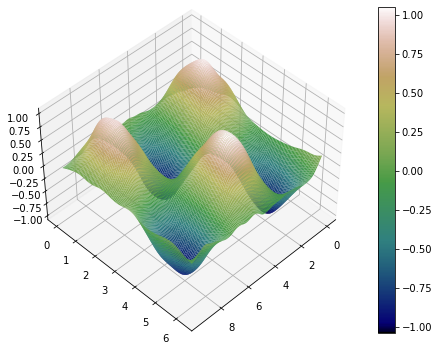

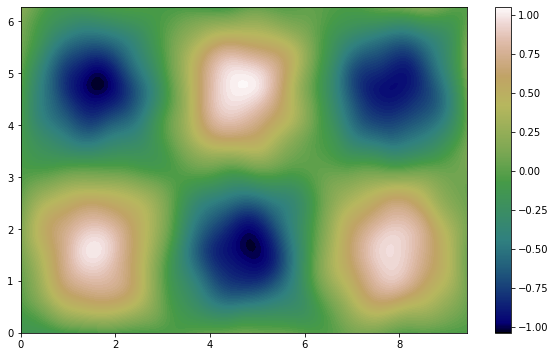

In [8]:
np.random.seed(5)
x6_0 = np.linspace(0, 3 * np.pi, 301)
x6_1 = np.linspace(0, 2 * np.pi, 201)
y6 = np.outer(np.sin(x6_0), np.sin(x6_1)) + np.random.normal(0, 1, (301, 201))
example6 = GridCPsplines(
    deg=(3, 3),
    ord_d=(2, 2),
    n_int=(30, 20),
    sp_method="grid_search",
    sp_args={"top_n": 5, "parallel": True},
)
example6.fit(x=(x6_0, x6_1), y=y6)

plot6 = plot_surfaces(
    fittings=(example6,),
    col_surface=("gist_earth",),
    orientation=(45,45),
    figsize=(10, 6),
)

*Example 7*. Given the same function and generative process as *Example 6*, we
fit a constrained model imposing non-negativity at the knots over the interval
$[0,3\pi]\times [0,2\pi]$. 

Starting the optimization algorithm
sp1		sp2		Objective
1.00063e+00	1.00067e+00	1.01046e+00
1.00381e+00	1.00401e+00	1.01045e+00
1.01960e+00	1.02063e+00	1.01043e+00
1.09708e+00	1.10216e+00	1.01034e+00
1.45115e+00	1.47476e+00	1.00998e+00
2.30918e+00	2.37768e+00	1.00944e+00
3.40002e+00	3.52558e+00	1.00904e+00
5.12890e+00	5.34492e+00	1.00866e+00
7.64446e+00	7.99209e+00	1.00832e+00
1.14322e+01	1.19780e+01	1.00802e+00
1.70333e+01	1.78721e+01	1.00776e+00
2.51827e+01	2.64480e+01	1.00753e+00
3.65843e+01	3.84461e+01	1.00735e+00
5.14514e+01	5.40910e+01	1.00722e+00
6.89463e+01	7.25013e+01	1.00714e+00
8.44562e+01	8.88226e+01	1.00710e+00
9.50872e+01	1.00010e+02	1.00710e+00
9.71988e+01	1.02232e+02	1.00710e+00
9.92032e+01	1.04341e+02	1.00710e+00
9.81391e+01	1.03221e+02	1.00710e+00


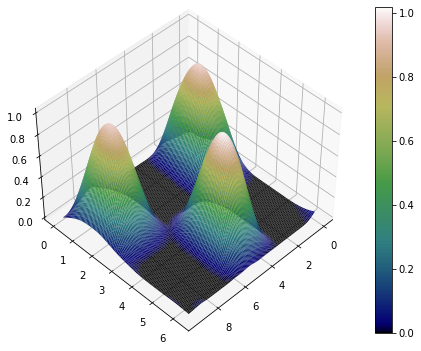

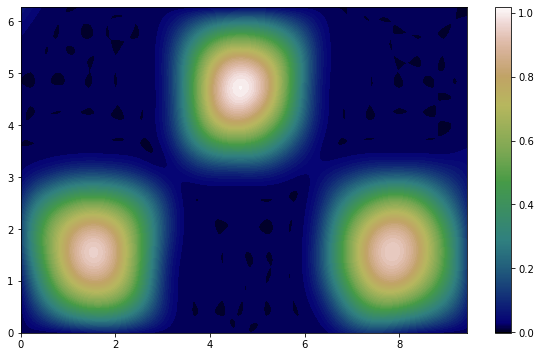

In [9]:
np.random.seed(5)
x7_0 = np.linspace(0, 3 * np.pi, 301)
x7_1 = np.linspace(0, 2 * np.pi, 201)
y7 = np.outer(np.sin(x7_0), np.sin(x7_1)) + np.random.normal(0, 1, (301, 201))
example7 = GridCPsplines(
    deg=(3, 3),
    ord_d=(2, 2),
    n_int=(30, 20),
    sp_args={"verbose": True, "options": {"ftol": 1e-12}},
    int_constraints={0: {0: {"+": 0}}, 1: {0: {"+": 0}}}
)
example7.fit(x=(x7_0, x7_1), y=y7)

plot7 = plot_surfaces(
    fittings=(example7,),
    col_surface=("gist_earth",),
    orientation=(45, 45),
    figsize=(10, 6),
)

*Example 8*. Given the same function and generative process as *Example 6*, we
fit a constrainted model imposing non-decreasing constraint along the y-direction at the knots over the interval $[0,3\pi]\times [0,2\pi]$.

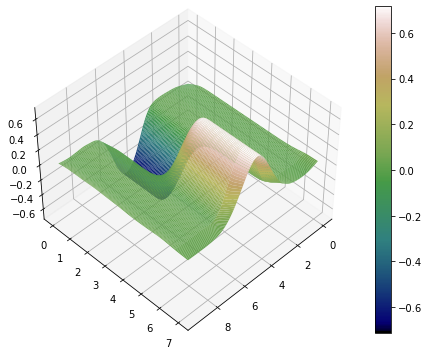

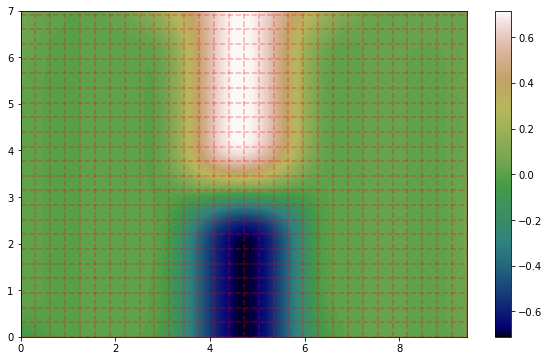

In [10]:
np.random.seed(5)
x8_0 = np.linspace(0, 3 * np.pi, 301)
x8_1 = np.linspace(0, 2 * np.pi, 201)
y8 = np.outer(np.sin(x8_0), np.sin(x8_1)) + np.random.normal(0, 1, (301, 201))
example8 = GridCPsplines(
    deg=(3, 3),
    ord_d=(2, 2),
    n_int=(30, 20),
    x_range={1: (7,)},
    sp_args={"options": {"ftol": 1e-12}},
    int_constraints={1: {1: {"+": 0}}}
)
example8.fit(x=(x8_0, x8_1), y=y8)

plot8 = plot_surfaces(
    fittings=(example8,),
    col_surface=("gist_earth",),
    orientation=(45, 45),
    figsize=(10, 6),
    knot_positions=True
)

*Example 9*. Given the same function and generative process as *Example 6*, we
fit a constrainted model imposing non-increasing constraint along the x-direction at the knots over the interval $[0,3\pi]\times [0,2\pi]$.

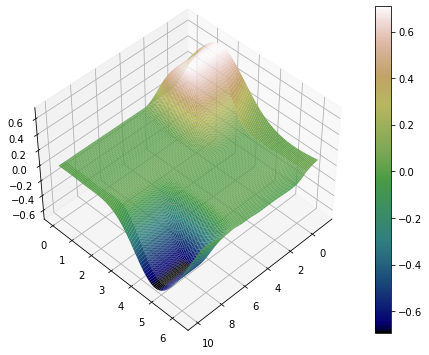

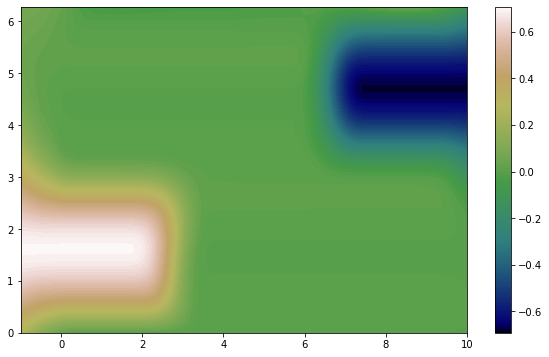

In [11]:
np.random.seed(5)
x9_0 = np.linspace(0, 3 * np.pi, 301)
x9_1 = np.linspace(0, 2 * np.pi, 201)
y9 = np.outer(np.sin(x9_0), np.sin(x9_1)) + np.random.normal(0, 1, (301, 201))
example9 = GridCPsplines(
    deg=(3, 3),
    ord_d=(2, 2),
    n_int=(30, 20),
    x_range={0: (-1,10)},
    sp_args={"options": {"ftol": 1e-12}},
    int_constraints={0: {1: {"-": 0}}}
)
example9.fit(x=(x9_0, x9_1), y=y9)

plot9 = plot_surfaces(
    fittings=(example9,),
    col_surface=("gist_earth",),
    orientation=(45, 45),
    figsize=(10, 6)
)

*Example 10*. Given the function 
$$f(x, y, z) = \sin(x)\sin(y)\sin(z)$$
we simulated data following the scheme
$$t_{lmn}= f(x_l, y_m, z_n),$$
where $x_l=\{\frac{l\pi}{10}\}_{l=0}^{30}$, 
$y_m=\{\frac{m\pi}{20}\}_{m=0}^{40}$ and $z_n=\{\frac{n\pi}{50}\}_{n=0}^{50}$.

We fit an unconstrained over the interval $[0,3\pi]\times [0,2\pi]\times [0,\pi]$. 

Starting the optimization algorithm
sp1		sp2		sp3		Objective
9.99438e-01	9.99904e-01	9.99986e-01	5.27648e-04
9.96626e-01	9.99423e-01	9.99918e-01	5.26020e-04
9.82574e-01	9.97018e-01	9.99576e-01	5.17896e-04
9.12488e-01	9.85028e-01	9.97870e-01	4.77681e-04
5.66522e-01	9.25847e-01	9.89450e-01	2.87847e-04
1.00000e-10	8.28903e-01	9.75660e-01	3.98090e-05
1.00000e-10	8.28903e-01	9.75660e-01	3.98090e-05


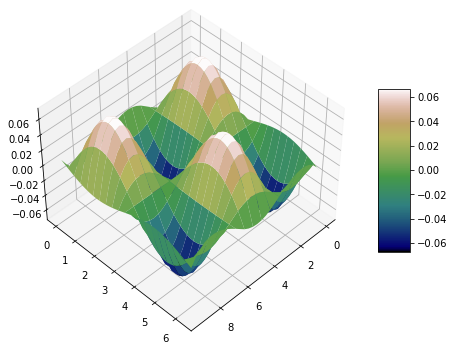

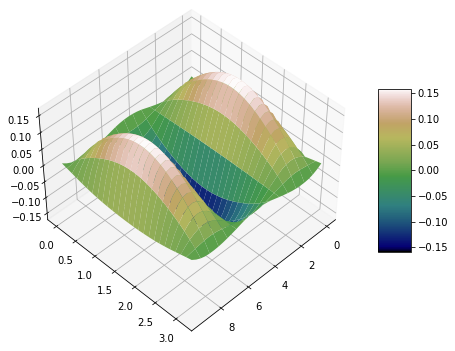

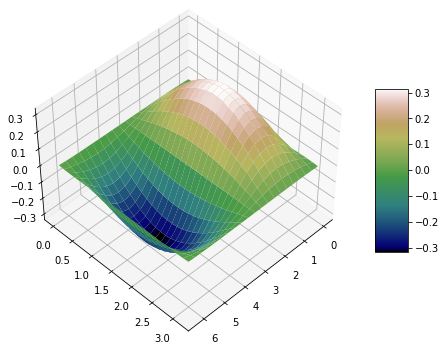

In [12]:
x10_0 = np.linspace(0, 3 * np.pi, 31)
x10_1 = np.linspace(0, 2 * np.pi, 41)
x10_2 = np.linspace(0, 1 * np.pi, 51)
y10 = np.einsum('i,j,k->ijk',np.sin(x10_0), np.sin(x10_1), np.sin(x10_2))

example10 = GridCPsplines(
    deg=(2, 3, 4),
    ord_d=(1, 2, 2),
    n_int=(8, 9, 10),
    sp_args={"verbose": True, "options": {"ftol": 1e-7}},
)
example10.fit(x=(x10_0, x10_1, x10_2), y=y10)

x_comb = list(itertools.combinations((x10_0, x10_1, x10_2), 2))
y_comb = (example10.y_fitted[:, :, 1],
          example10.y_fitted[:, 1, :],
          example10.y_fitted[1, :, :])

for x, y in zip(x_comb, y_comb):
    Z, X = np.meshgrid(*x)
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(
        Z,
        X,
        y.T,
        cmap=plt.get_cmap("gist_earth"),
        rstride=2,
        cstride=2,
    )
    _ = ax.view_init(45, 45)
    _ = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)


*Example 11*. Given the same function and generative process as *Example 10*, we
fit a constrained model imposing non-negativity at the knots over the interval
$[0,3\pi]\times [0,2\pi] \times [0,\pi]$. 

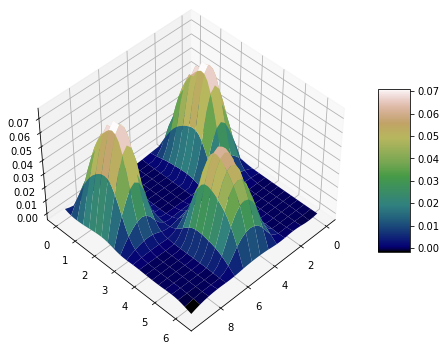

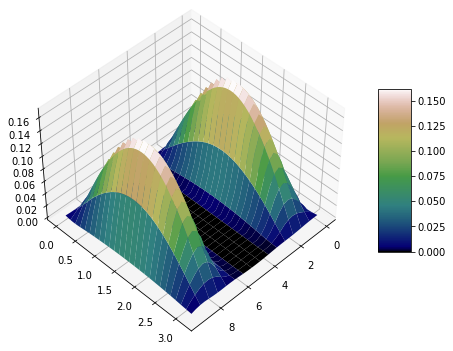

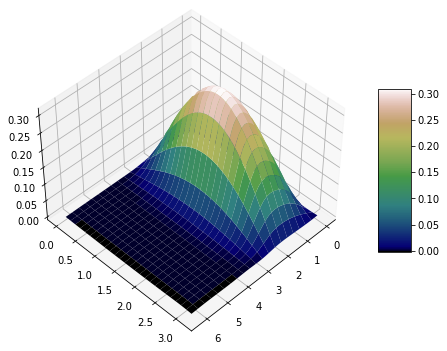

In [13]:
x11_0 = np.linspace(0, 3 * np.pi, 31)
x11_1 = np.linspace(0, 2 * np.pi, 41)
x11_2 = np.linspace(0, 1 * np.pi, 51)
y11 = np.einsum('i,j,k->ijk', np.sin(x11_0), np.sin(x11_1), np.sin(x11_2))

example11 = GridCPsplines(
    deg=(2, 3, 4),
    ord_d=(1, 2, 2),
    n_int=(8, 9, 10),
    sp_method="grid_search",
    sp_args={"grid": ((0.1, 0.4), (0.2, 0.5), (0.3,)),
             "verbose": True,
             "parallel": True},
    int_constraints={0: {0: {"+": 0}}, 1: {0: {"+": 0}}, 2: {0: {"+": 0}}}
)
example11.fit(x=(x11_0, x11_1, x11_2), y=y11)


x_comb = list(itertools.combinations((x11_0, x11_1, x11_2), 2))
y_comb = (example11.y_fitted[:, :, 1],
          example11.y_fitted[:, 1, :],
          example11.y_fitted[1, :, :])

for x, y in zip(x_comb, y_comb):
    Z, X = np.meshgrid(*x)
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111, projection="3d")
    surf = ax.plot_surface(
        Z,
        X,
        y.T,
        cmap=plt.get_cmap("gist_earth"),
        rstride=2,
        cstride=2,
    )
    _ = ax.view_init(45, 45)
    _ = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)


*Example 12*. Given the same function and generative process as *Example 4*, we
fit an unconstrained and multiple constrained models imposing the following
point constraints with tolerance $10^{-8}$:
- At point $x_k = 0.8$, the value of the curve is $y_k = 3$.
- At point $x_k = 0.8$, the derivative of the curve is $y_k' = 25$.
- At point $x_k = 0.8$, the second derivative of the curve is $y_k'' = 700$.

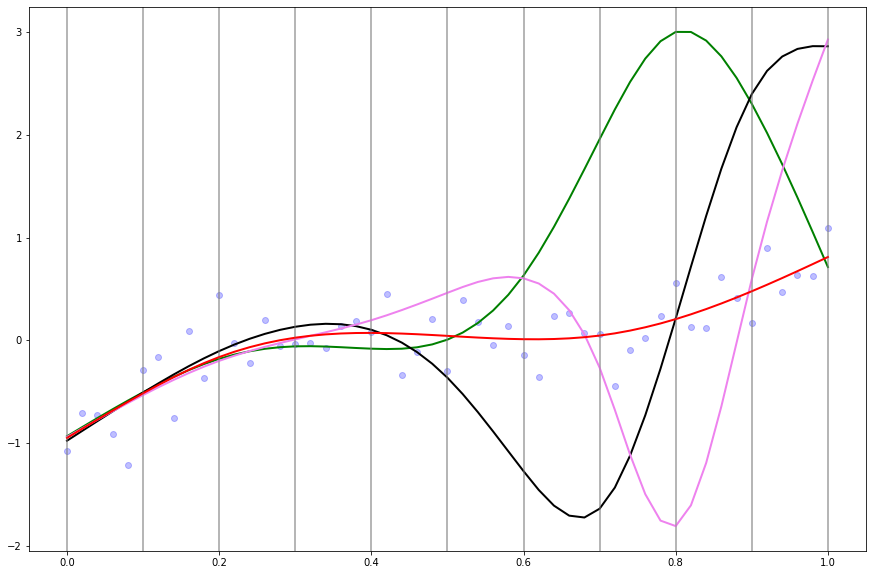

In [14]:
np.random.seed(6)
x12 = np.linspace(0, 1, 51)
y12 =  (2 * x12 - 1) ** 3 + np.random.normal(0, 0.25, 51)

example12_1 = GridCPsplines(
    deg=(3,),
    ord_d=(2,),
    n_int=(10,),
    sp_args={"options": {"ftol": 1e-12}},
    pt_constraints={(0,): ((np.array([0.8]),), np.array([3]), 1e-8)}
)
example12_1.fit(x=(x12,), y=y12)

example12_2 = GridCPsplines(
   deg=(3,),
   ord_d=(2,),
   n_int=(10,),
   sp_args={"options": {"ftol": 1e-12}},
   pt_constraints={(1,): ((np.array([0.8]),), np.array([25]), 1e-8)}
)
example12_2.fit(x=(x12,), y=y12)

example12_3 = GridCPsplines(
    deg=(3,),
    ord_d=(2,),
    n_int=(10,),
    sp_args={"options": {"ftol": 1e-12}},
    pt_constraints={(2,): ((np.array([0.8]),), np.array([700]), 1e-8)}
)
example12_3.fit(x=(x12,), y=y12)


example12_4 = GridCPsplines(
    deg=(3,),
    ord_d=(2,),
    n_int=(10,),
    sp_args={"options": {"ftol": 1e-12}},
)
example12_4.fit(x=(x12,), y=y12)

plot12 = plot_curves(
    fittings=(example12_1, example12_2, example12_3, example12_4),
    col_curve=("g", "k", "violet", "r"),
    knot_positions=True,
    constant_constraints=True,
    x=(x12, ), 
    y=(y12, ),
    col_pt=("b",),
    alpha=0.25
)

*Example 13*. Given the function 
$$f(x, y) = \sin(x)\sin(y)$$
we simulated noisy data following the scheme
$$z_{lm}= f(x_l, y_m)+\varepsilon_{lm}, \quad \varepsilon_{lm}\sim \text{N}(0,1),$$
where $x_l=\{\frac{l\pi}{10}\}_{l=0}^{30}$ and $y_m=\{\frac{m\pi}{10}\}_{m=0}^{20}$.

We fit an unconstrained and a constrained model over the interval
$[0,3\pi]\times [0,2\pi]$ imposing that the value of the surface at $(x_k, y_k)=(1,1)$ is $z_k=4$.

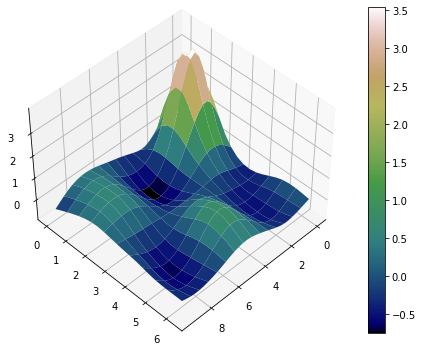

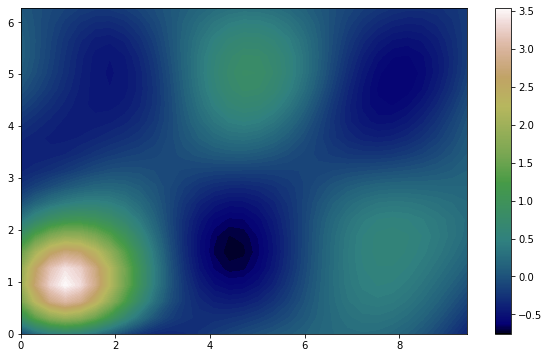

In [15]:
np.random.seed(5)
x13_0 = np.linspace(0, 3 * np.pi, 31)
x13_1 = np.linspace(0, 2 * np.pi, 21)
y13 = np.outer(np.sin(x13_0), np.sin(x13_1)) + np.random.normal(0, 1, (31, 21))
example13 = GridCPsplines(
    deg=(3, 3),
    ord_d=(2, 2),
    n_int=(10, 9),
    sp_method="grid_search",
    pt_constraints={(0,0): ((np.array([1]), np.array([1]), ), np.array([4]), 1e-8)}
)
example13.fit(x=(x13_0, x13_1), y=y13)

plot13 = plot_surfaces(
    fittings=(example13,),
    col_surface=("gist_earth",),
    orientation=(45, 45),
    figsize=(10, 6),
)

*Example 14*. Given the gaussian function 
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}$$
with $\mu=0$ and $\sigma=2$, we simulated noisy data following the scheme
$$y_{l}= f(x_l)+\varepsilon_{l}, \quad \varepsilon_{l}\sim \text{N}(0,0.025),$$
where $x_l=\{\frac{l -100}{10}\}_{l=0}^{200}$.

We fit an unconstrained and a constrained model over the interval $[-10,10]$
imposing that the curve is a probability density function, i.e., it is
non-negative and it integrates to one over the fitting region. 

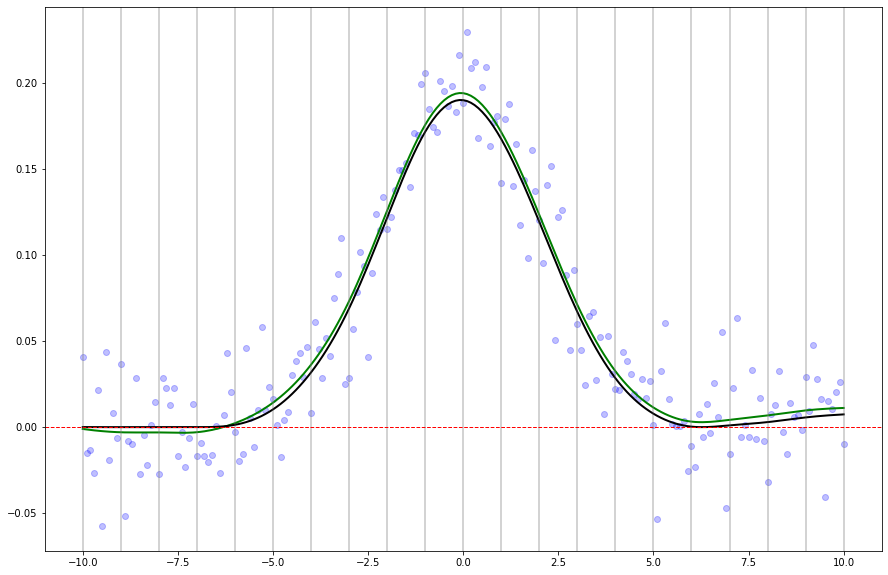

In [66]:
np.random.seed(1)
x14 = np.linspace(-10, 10, 201)
y14 = norm.pdf(x14,0,2) + np.random.normal(0, 0.025, 201)

example14_1 = GridCPsplines(
    deg=(3,),
    ord_d=(2,),
    n_int=(20,),
    sp_args={"options": {"ftol": 1e-12}},
    pdf_constraint=False
)
example14_1.fit(x=(x14,), y=y14)

example14_2 = GridCPsplines(
   deg=(3,),
   ord_d=(2,),
   n_int=(20,),
   sp_args={"options": {"ftol": 1e-12}},
   pdf_constraint=True)
example14_2.fit(x=(x14,), y=y14)

plot14 = plot_curves(
    fittings=(example14_1, example14_2),
    col_curve=("g", "k"),
    knot_positions=True,
    constant_constraints=True,
    x=(x14,), 
    y=(y14,),
    col_pt=("b",),
    alpha=0.25)

*Example 15*. Given the bivariate gaussian function 
$$f(\mathbf{x}) = \frac{1}{2\pi\sqrt{|\boldsymbol{\Sigma}|}}\exp\left\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^\top
\boldsymbol{\Sigma}^{-1} (\mathbf{x}-\boldsymbol{\mu})\right\}$$
with $\mathbf{x}=(x,y)$, $\boldsymbol{\mu}=(0,0)$ and $\boldsymbol{\Sigma}=\begin{pmatrix} 2 & 1/2 \\ 1/2 & 1
\end{pmatrix},$ we simulated noisy data following the scheme
$$z_{lm}= f(x_l, y_m)+\varepsilon_{lm}, \quad \varepsilon_{lm}\sim \text{N}(0,0.025),$$
where $x_l=\{\frac{3l -75}{25}\}_{l=0}^{50}$ and $y_m=\{\frac{2m -60}{15}\}_{m=0}^{60}$.

We fit an unconstrained and a constrained model over the interval $[-3,3]\times
[-4,4]$ imposing that the curve is a probability density function, i.e., it is
non-negative and it integrates to one over the fitting region. 

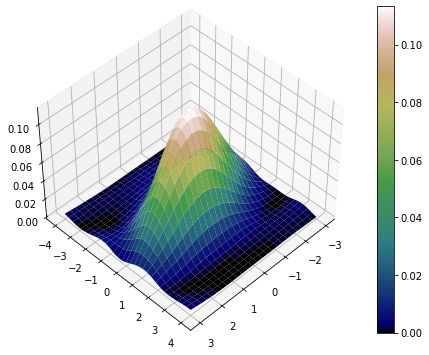

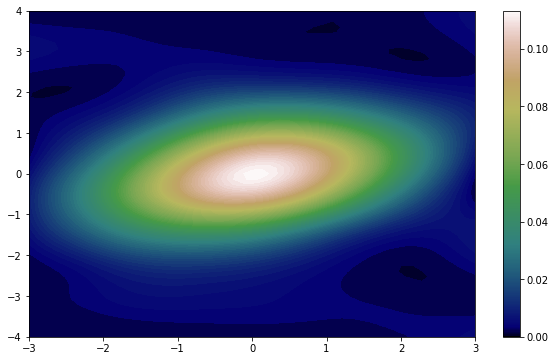

In [70]:
x15_0 = np.linspace(-3,3,51)
x15_1 = np.linspace(-4,4,61)
y15 = (multivariate_normal.pdf(x = list(itertools.product(x15_0, x15_1)),
                               mean=[0,0],
                               cov=[[2,0.5],[0.5,1]]) + np.random.normal(0, 0.025, len(x15_0)*len(x15_1))).reshape((len(x15_0),len(x15_1)))

example15 = GridCPsplines(
    deg=(3, 3),
    ord_d=(2, 2),
    n_int=(10, 9),
    sp_method="grid_search",
    int_constraints={0: {0: {"+": 0}}, 1: {0: {"+": 0}}},
    pdf_constraint=True
    
)
example15.fit(x=(x15_0, x15_1), y=y15)

plot15 = plot_surfaces(
    fittings=(example15,),
    col_surface=("gist_earth",),
    orientation=(45, 45),
    figsize=(10, 6),
)